example
0
hub -> repeat
1
repeat -> end1
2
end1 -> repeat
3
repeat -> end2
4
repeat -> end2
5
end2 -> repeat
6

repeat 0~6
end1 1~3
end2 3~6

In [4]:
retry_p
retry_p_array = [0]

In [5]:
import random
ontimes_child = []
ontimes_repeat = []
success_rate_array = []
# endとrepeatの通信は最小でsend_delay、最大でtimeout
child_num = 10
simulation_num = 100
time_span = 600
max_retry = 5
# retry_p = 0.01
retry_sum = 0
send_delay = 1
send_timeout_delay = 3
# time_error_wait_time = 1
for retry_p in [num * 0.01 for num in range(0, 101)]:
    time = 0
    success_rate = 0

    alive = [True]*child_num
    ontime = [0]*(child_num+1)
    wakeup_time = [0]*(child_num+1)
    for i in range(1,child_num+1):
        # wakeup_time[i] = send_delay*2*i-time_error_wait_time 
        # wakes up at this time on their clock, but in reality it's send_delay*2*i
        # because the time is delayed due to sending delay
        wakeup_time[i] = send_delay*2*i - send_delay


    for _ in range(simulation_num):

        time = round(time+1,2)

        for child_id in range(child_num):
            if alive[child_id]:
                # repeat->end
                retry_num = 0
                # get retry count
                for i in range(max_retry):
                    if random.random()>retry_p:
                        break
                    else:
                        retry_num += 1
                
                # add time
                retry_sum += retry_num
                time = round(time+send_delay*(1+retry_num),2)
            
                if retry_num == max_retry and random.random()<=retry_p:
                    # communication failed
                    pass
                else:
                    # end->repeat
                    retry_num = 0
                    # get retry count
                    for i in range(max_retry):
                        if random.random()>retry_p:
                            break
                        else:
                            retry_num += 1

                    # add time
                    retry_sum += retry_num 
                    time = round(time+send_delay*(1+retry_num),2)
                    if retry_num == max_retry and random.random()<=retry_p:
                        pass
                    else:
                        success_rate += 1
                # add ontime the time on
                ontime[child_id+1] += (time%time_span-wakeup_time[child_id+1])
                # print(time,wakeup_time[child_id+1])
                if time%time_span-wakeup_time[child_id+1] <=0:
                    print("warning")

            else:
                # timeout
                time = round(time+send_timeout_delay,2)

        ontime[0] += (time%time_span-wakeup_time[0])

        time = round(time+(time_span-time%time_span),2)


    for i in range(len(ontime)):
        ontime[i] /= simulation_num

    ontimes_child.append(sum(ontime[1:])/child_num)
    ontimes_repeat.append(ontime[0])
    success_rate_array.append(success_rate/(simulation_num*child_num))
print(ontimes_child)

ontimes_repeat_request = ontimes_repeat
ontimes_child_request = ontimes_child
success_rate_array_request = success_rate_array

[2.0, 2.1189999999999998, 2.21, 2.3189999999999995, 2.4379999999999997, 2.566, 2.62, 2.8280000000000003, 2.9259999999999997, 3.1759999999999997, 3.22, 3.399, 3.3370000000000006, 3.6060000000000003, 3.9739999999999993, 4.02, 4.246, 4.2780000000000005, 4.460000000000001, 4.6530000000000005, 4.62, 5.132, 4.974000000000001, 5.085999999999999, 5.508000000000001, 5.7829999999999995, 5.7909999999999995, 6.088, 6.313, 6.768000000000001, 6.812, 7.0840000000000005, 6.964, 7.33, 7.502, 7.455, 8.224, 8.087, 8.440000000000001, 9.198, 9.078, 9.524, 9.350000000000001, 10.382000000000001, 10.293000000000001, 10.525, 11.106999999999998, 11.283, 11.227, 11.872, 12.455, 12.599, 13.486, 13.243, 14.190999999999999, 14.567000000000002, 15.143, 15.15, 16.220999999999997, 15.719999999999999, 16.828, 17.014999999999997, 16.85, 18.066, 18.787, 19.185, 20.166, 20.242, 20.186, 21.102, 21.094, 22.149, 22.013, 23.452999999999996, 23.127000000000002, 24.398999999999997, 24.458000000000002, 25.294, 25.628000000000004

child_num: 10
simulation_num: 100
time_span: 600
send_delay: 1
time_span: 600
repeat on time


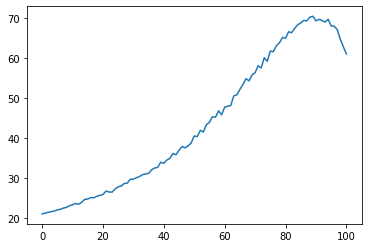

child average on time


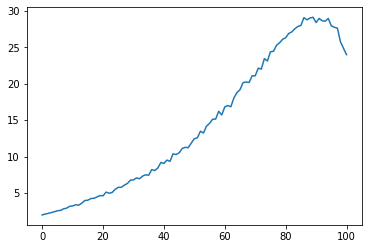

success rate for repeat <-> child


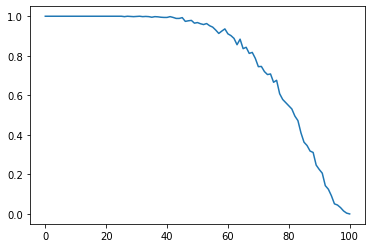

In [6]:
import matplotlib.pyplot as plt
print("child_num: "+str(child_num))
print("simulation_num: "+str(simulation_num))
print("time_span: "+str(time_span))
print("send_delay: "+str(send_delay))
print("time_span: "+str(time_span))

print("repeat on time")
plt.plot(ontimes_repeat)
plt.show()
print("child average on time")
plt.plot(ontimes_child)
plt.show()
print("success rate for repeat <-> child")
plt.plot(success_rate_array)
plt.show()


example

0
hub -> repeat
1
repeat -> all end
2
end1 -> repeat
3
(end1 -> repeat)
4
(end1 -> repeat)
5
end2 -> repeat
6
end2 -> repeat
7
(end2 -> repeat)
8

repeat 0~8
end1 1~3
end2 1, 3~6

In [7]:
import random
ontimes_child = []
ontimes_repeat = []
success_rate_array = []
# endとrepeatの通信は最小でsend_delay、最大でtimeout
child_num = 10
simulation_num = 1000
time_span = 600
max_retry = 5
# retry_p = 0.01
retry_sum = 0
send_delay = 1
send_timeout_delay = 3
# time_error_wait_time = 1
for retry_p in [num * 0.01 for num in range(0, 101)]: # 0,101
    time = 0
    success_rate = 0

    alive = [True]*child_num
    ontime = [0]*(child_num+1)
    wakeup_time = [0]*(child_num+1)
    for i in range(1,child_num+1):
        # wakeup_time[i] = send_delay*2*i-time_error_wait_time 
        # wakes up at this time on their clock, but in reality it's send_delay*2*i
        # because the time is delayed due to sending delay
        wakeup_time[i] = send_delay*2 + send_delay*(1+max_retry)*(i-1)

    for _ in range(simulation_num):

        time = round(time+send_delay*2,2)

        for child_id in range(child_num):
            if alive[child_id]:
                # end->repeat
                retry_num = 0
                # get retry count
                for i in range(max_retry):
                    if random.random()>retry_p:
                        break
                    else:
                        retry_num += 1
                
                # add time
                retry_sum += retry_num
                time = round(time+send_delay*(1+retry_num),2)
            
                if retry_num == max_retry and random.random()<=retry_p:
                    # communication failed
                    pass
                else:
                    success_rate += 1

                # add ontime the time on
                ontime[child_id+1] += (time%time_span-wakeup_time[child_id+1]) + send_delay # add the time to receive now time
                # print(time,wakeup_time[child_id+1])
                if time%time_span-wakeup_time[child_id+1] <=0:
                    print("warning")
                
                time = round(time+send_delay*(max_retry-retry_num),2)

            else:
                # timeout
                time = round(time+send_timeout_delay,2)

        ontime[0] += (time%time_span-wakeup_time[0])

        time = round(time+(time_span-time%time_span),2)


    for i in range(len(ontime)):
        ontime[i] /= simulation_num
    ontimes_child.append(sum(ontime[1:])/child_num)
    ontimes_repeat.append(ontime[0])
    success_rate_array.append(success_rate/(simulation_num*child_num))
print(ontimes_child)

ontimes_repeat_timeslot = ontimes_repeat
ontimes_child_timeslot = ontimes_child
success_rate_array_timeslot = success_rate_array


[2.0, 2.01, 2.0202, 2.032, 2.0374000000000003, 2.0541, 2.0652999999999997, 2.0739, 2.0858999999999996, 2.0968, 2.1116, 2.1226, 2.1372999999999998, 2.1487000000000003, 2.1616000000000004, 2.1752000000000002, 2.1925, 2.2079, 2.2199000000000004, 2.2376, 2.2523999999999997, 2.2673, 2.2845000000000004, 2.2934000000000005, 2.3297, 2.3251, 2.3554000000000004, 2.3739999999999997, 2.3988, 2.4098999999999995, 2.4118000000000004, 2.4635000000000002, 2.4653, 2.4943, 2.5060000000000002, 2.5244999999999997, 2.5471, 2.585, 2.6088000000000005, 2.6296, 2.6628, 2.7103999999999995, 2.7122, 2.7446, 2.8091, 2.8030000000000004, 2.8393, 2.8584, 2.8889, 2.9511000000000003, 2.9646, 3.0096999999999996, 3.0499, 3.0837, 3.1297000000000006, 3.1774, 3.2077000000000004, 3.2247999999999997, 3.2852999999999994, 3.3298, 3.3755, 3.4400999999999997, 3.4638000000000004, 3.5424999999999995, 3.5961, 3.6478, 3.6803, 3.8027, 3.8182, 3.9006, 3.9452, 4.0099, 4.075999999999999, 4.1369, 4.212199999999999, 4.2991, 4.354, 4.4072000

child_num: 10
simulation_num: 1000
time_span: 600
send_delay: 1
time_span: 600
repeat on time


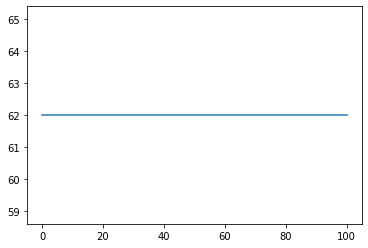

child average on time


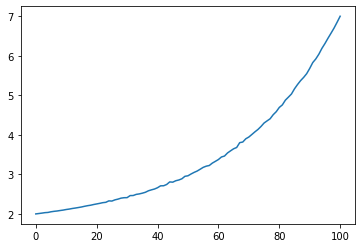

success rate for repeat <-> child


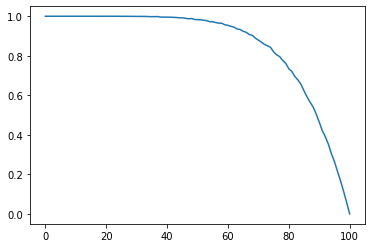

In [8]:
import matplotlib.pyplot as plt
print("child_num: "+str(child_num))
print("simulation_num: "+str(simulation_num))
print("time_span: "+str(time_span))
print("send_delay: "+str(send_delay))
print("time_span: "+str(time_span))

print("repeat on time")
plt.plot(ontimes_repeat)
plt.show()
print("child average on time")
plt.plot(ontimes_child)
plt.show()
print("success rate for repeat <-> child")
plt.plot(success_rate_array)
plt.show()

# fig = plt.figure(figsize = (10,20))

# ax1 = fig.add_subplot(3, 1, 1)
# ax2 = fig.add_subplot(3, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

# ax1.plot(ontimes_repeat)
# ax2.plot(ontimes_child)
# ax3.plot(success_rate_array)

# ax1.set_title("repeat on-time")
# ax2.set_title("end average on-time")
# ax3.set_title("success rate for repeat <-> end")

# ax1.set_xlabel("retry probability")
# ax2.set_xlabel("retry probability")
# ax3.set_xlabel("retry probability")

# ax1.set_ylabel("(s)")
# ax2.set_ylabel("(s)")

# plt.show()

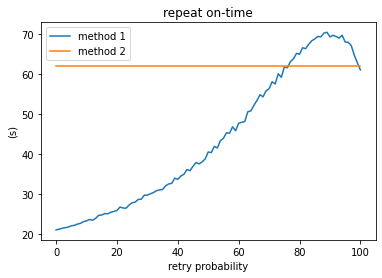

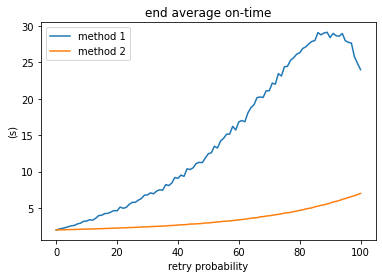

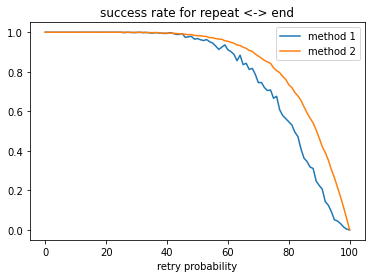

In [9]:
plt.figure(facecolor="white")
plt.plot(ontimes_repeat_request, label="method 1")
plt.plot(ontimes_repeat_timeslot, label="method 2")
plt.legend()
plt.title("repeat on-time")
plt.xlabel("retry probability")
plt.ylabel("(s)")
plt.show()

plt.figure(facecolor="white")
plt.plot(ontimes_child_request, label="method 1")
plt.plot(ontimes_child_timeslot, label="method 2")
plt.legend()
plt.title("end average on-time")
plt.xlabel("retry probability")
plt.ylabel("(s)")
plt.show()

plt.figure(facecolor="white")
plt.plot(success_rate_array_request, label="method 1")
plt.plot(success_rate_array_timeslot, label="method 2")
plt.legend()
plt.title("success rate for repeat <-> end")
plt.xlabel("retry probability")
# plt.ylabel("(s)")
plt.show()

you could decide max retry based on the acceptable success rate